# Задание
Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет www.kaggle.com...iques/data (train.csv)
Построить случайный лес, вывести важность признаков
Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt



In [2]:
data  =  pd.read_csv('train.csv')

In [4]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# разделяем на тренировочные и тестовые данные
data_train, data_test, y_train, y_test = train_test_split(data.drop(columns = 'SalePrice'),
                                                          data['SalePrice'],
                                                          test_size = 0.30,
                                                          random_state = 42)

In [12]:
#находим категориальные признаки

categorials = list(data.dtypes[data.dtypes == object].index)

categorials_nunique = data_train[categorials].nunique()

#закодируем пропущенные значения строкой, факт пропущенного значения тоже может нести в себе информацию
data[categorials] = data[categorials].fillna('nan')


In [13]:
# отфильтруем непрерывные признаки

integer  = [f for f in data if f not in (categorials + ['ID', 'SalePrice'])]


In [16]:
#создаем дамми-переменные для категорий

dummy_train = pd.get_dummies(data_train[categorials], columns = categorials)
dummy_test = pd.get_dummies(data_test[categorials], columns = categorials)

dummy_cols = list(set(dummy_train) & set (dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальные значения -999, что бы деревья могли их отличить(не обязательно теревья)

X_train = pd.concat([data_train[integer].fillna(-999), dummy_train], axis = 1)

X_test = pd.concat([data_test[integer].fillna(-999), dummy_test], axis = 1)

# Бегинг

In [17]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

# создаем беггинг передавая ему определенные гиперпараметры
bagging = BaggingRegressor(KNeighborsRegressor(), max_samples = 0.5 , max_features = 0.5)

In [18]:
# обучаем беггинг
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(), max_features=0.5,
                 max_samples=0.5)

In [19]:
bagging.score(X_train,y_train)

0.7235797235913377

In [20]:
bagging.score(X_train,y_train)

0.6799139025048868

In [22]:
#  пробуем на другом алгоритме , и пробуем беггин на решающих деревьях
from sklearn.tree import DecisionTreeRegressor
# создаем беггинг передавая ему определенные гиперпараметры
bagging = BaggingRegressor(DecisionTreeRegressor(), max_samples = 0.5 , max_features = 0.5)
# обучаем беггинг
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=0.5,
                 max_samples=0.5)

In [23]:
bagging.score(X_train,y_train)

0.9196022940331499

In [24]:
bagging.score(X_test,y_test)

0.8484128408008345

In [26]:
# создаем модель рандомного леса(беггинг над деревьями, но с использованием случайных подпространств)
clf_rf = RandomForestRegressor()
clf_rf.fit (X_train, y_train)


RandomForestRegressor()

In [28]:
# проверяем полученные данные на тренировочных данных
clf_rf.score(X_train,y_train)

0.9776461195323027

In [30]:
# проверяем полученные данные на тестовых данных
clf_rf.score(X_test,y_test)

0.8938788046477368

In [ ]:
# модель получилось немного переобученная

In [ ]:
#  выявляем наиболее важные признаки и выводим на график. 
# Большое значение имеет признак Overall Qual, остальные почти равны нулю

In [31]:
imp = pd.Series(clf_rf.feature_importances_)

In [32]:
imp.index  = pd.Series(X_train.columns)

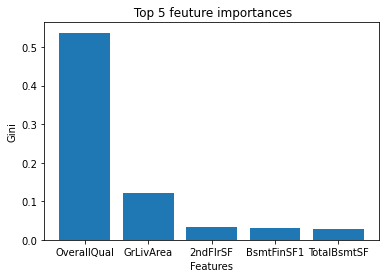

In [34]:
plt.title(' Top 5 feuture importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending = False).head())
plt.show()

# Стэккинг



In [35]:
from sklearn.ensemble import StackingRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [39]:
# создаем стэккинг и обучаем его на наших данных

Regressor = StackingRegressor(
[
    ('LinearRegression',LinearRegression()),# Берем сначало обычную линейную регресисию
    ('KNeighborsRegressor',KNeighborsRegressor()),#  потом алгоритм на ближайших соседей
    ('DecisionTreeRegressor', DecisionTreeRegressor())  # потом регрессор на основе решающего дерева   
], RidgeCV() # Все 3 алгоритма дают нам ответ и  этот ответ с помощью линейной регресии обьединяем с L2 регуляризацией для того что бы сильно коллерированные данные нормально обьединились
)


С помощью крос валидации  ...CV() проверяется качество.

Крос вадидация работает:  

вся выборка обучающая делится на фолды.
1  фолд откладываем для теста, на остальных обучаемся.
Обучились, и следом подсчитали на тесте качество.
Теперь мы замелили фолд и сделаи еще раз, и так прошлись по всем фолдам.
И у нас получилось количество значений качества равное количеству фолдов.
И мы это качество усредняем. и получаем качество иодели которое она показывает усредненное.
Оно меньше зависит от виду разбиения и это значени качество более устойчиво к разбиению.


In [40]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTreeRegressor',
                               DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [41]:
print(f' Score on train data {Regressor.score(X_train,y_train)}')
print(f' Score on test data {Regressor.score(X_test,y_test)}')

for i in Regressor.named_estimators:
    print(f' Score on train data with models {i} {Regressor.named_estimators_[i].score(X_train,y_train)}')
    print(f' Score on test data with models {i} {Regressor.named_estimators_[i].score(X_test,y_test)}')

 Score on train data 0.9521874664561617
 Score on test data 0.855335401579457
 Score on train data with models LinearRegression 0.922108540356243
 Score on test data with models LinearRegression 0.8533836050579271
 Score on train data with models KNeighborsRegressor 0.7419951520813983
 Score on test data with models KNeighborsRegressor 0.6775304068635524
 Score on train data with models DecisionTreeRegressor 1.0
 Score on test data with models DecisionTreeRegressor 0.7242587342636269


Лучше всего справилась линейная регрсссия. деревья решений как и предполагалось переобучилась. Алгоритм ближайшего соседа
тоже неплохо справился с задачей

In [43]:
score_train = {}
score_test = {}

for i in Regressor.named_estimators:
    score_train[i] = Regressor.named_estimators_[i].score(X_train, y_train)
    score_test[i] = Regressor.named_estimators_[i].score(X_test, y_test)
    
    score_train['Total'] = Regressor.score(X_train, y_train)
    score_test['Total'] = Regressor.score(X_test, y_test)

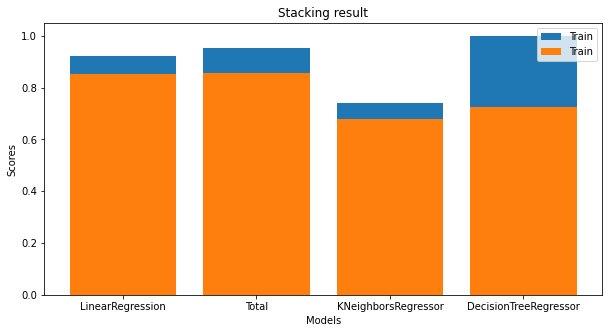

In [46]:
#  смотрим график результатов
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align = 'center', label = 'Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))

plt.bar(range(len(score_test)), score_test.values(), align = 'center', label = 'Train')
plt.xticks(range(len(score_test)), list(score_test.keys()))

plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()

# Бустинг

In [48]:
!pip install lightgbm
from lightgbm import LGBMRegressor

In [52]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
pred

array([141951.15320314, 296659.89205524, 115537.13145   , 156451.31020782,
       321895.30763099,  77948.67149285, 223373.24242701, 147411.49535648,
        76911.99264539, 126154.1556003 , 155275.46031831, 122764.01080345,
       116988.32653636, 194067.6447245 , 168338.72888686, 127771.13435703,
       193179.37632143, 127550.32021936, 120825.4087077 , 207029.17831593,
       156153.91984137, 226152.26494069, 172048.98027845, 130584.55786535,
       203390.28851837, 167128.26707147, 200893.52670638, 104233.31417366,
       177107.64725481, 212861.43280882, 118972.33910286, 240548.79935747,
       169884.46469426, 110384.26975375, 245769.33868933, 147669.92572792,
       118095.01136874, 204178.42156892, 326188.40524616, 111420.12499864,
       132800.95690742, 238468.95175748, 118648.38672376, 365456.31350456,
       127097.2567579 , 117583.03752973, 114677.6786483 , 123751.75702669,
       441475.14089456, 135304.51018489, 117606.87302704, 200746.24476449,
       109243.22995949, 3

In [51]:
from sklearn.metrics import r2_score

r2_score( pred, y_test)

0.8801863245832537